# Chapter 2 Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups.

In [2]:
import nsfg
import first
import numpy as np

ModuleNotFoundError: No module named 'nsfg'

In [3]:
preg = nsfg.ReadFemPreg()

NameError: name 'nsfg' is not defined

In [4]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [ ]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [ ]:
print(CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb))
print(CohenEffectSize(firsts.prglngth, others.prglngth))

#### How does it compare to the difference in pregnancy length?
 
Unlike pregnancy length, the effect size of birthorder on birthweight is negative, meaning that the mean weight of first babies is smaller than that of other children. Though the effect size birthorder on birthweight is stronger than that of pregnancy length (-0.09 vs 0.03, respectively) it is still considered relatively small.

# Chapter 3 Exercise 1

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [5]:
import nsfg
import numpy as np
import thinkstats2
import thinkplot

ModuleNotFoundError: No module named 'nsfg'

In [3]:
resp = nsfg.ReadFemResp()

In [4]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='actual')

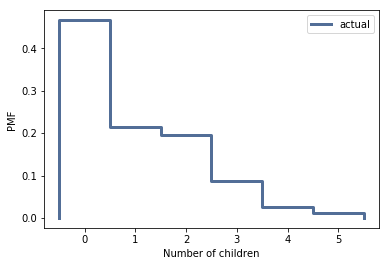

In [5]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [6]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

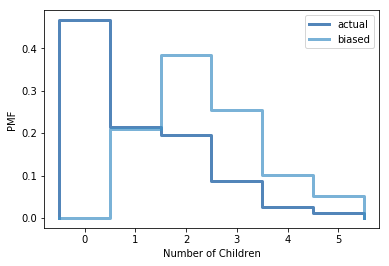

In [7]:
biased = BiasPmf(pmf, label='biased')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of Children', ylabel='PMF')

In [8]:
print('Actual mean:', pmf.Mean())
print('Observed mean:', biased.Mean())

Actual mean: 1.024205155043831
Observed mean: 2.403679100664282
